# Northern Ireland electoral wards

Downloaded from ONS Geography

In [1]:
import os
from datetime import datetime, timezone
from zipfile import ZipFile
import matplotlib.pyplot as plt
import geopandas as gpd
import pooch

In [2]:
FILE_NAME = "wards-uk-12-2022.zip"
URL = (
    "https://opendata.arcgis.com/api/v3/datasets/"
    "a2c204fedefe4120ac93f062c647bdcb_0/downloads/data?"
    "format=shp&spatialRefId=27700&where=1%3D1"
)
KNOWN_HASH = None
SUB_DIR = os.path.join("data", "boundaries", "ONS")
DATA_FILE = os.path.join(SUB_DIR, FILE_NAME)
os.makedirs(SUB_DIR, exist_ok=True)

In [3]:
# download data if necessary
if not os.path.isfile(os.path.join(SUB_DIR, FILE_NAME)):
    pooch.retrieve(
        url=URL, known_hash=KNOWN_HASH, fname=FILE_NAME, path=SUB_DIR
    )

    with open(
        os.path.join(SUB_DIR, f"{FILE_NAME[:-4]}.txt"), "w", encoding="utf-8"
    ) as outfile:
        outfile.write(
            f"Data downloaded on: {datetime.now(tz=timezone.utc)}\n"
            f"Download URL: {URL}"
        )

SHA256 hash of downloaded file: 3c39befbab09220c372282e986c2ba98f98e583d3a619997bd21017967d8abcd
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


In [3]:
ZipFile(DATA_FILE).namelist()

['WD_DEC_2022_UK_BFC.shp',
 'WD_DEC_2022_UK_BFC.shx',
 'WD_DEC_2022_UK_BFC.dbf',
 'WD_DEC_2022_UK_BFC.cpg',
 'WD_DEC_2022_UK_BFC.prj',
 'Wards_(December_2022)_Boundaries_UK_BFC.xml']

In [3]:
data = gpd.read_file(f"zip://{DATA_FILE}!WD_DEC_2022_UK_BFC.shp")

In [5]:
data.head()

,OBJECTID,WD22CD,WD22NM,WD22NMW,LAD22CD,LAD22NM,BNG_E,BNG_N,LONG,LAT,GlobalID,SHAPE_Leng,SHAPE_Area,geometry
0,1,E05000650,Astley Bridge,None,E08000001,Bolton,370670,412906,-2.44479,53.611889,{FB9555E0-FE42-4ED7-9525-83D2EF94B123},15040.493581,6.598171e+06,"POLYGON ((370294.199 414678.699, 370300.399 41..."
1,2,E05000651,Bradshaw,None,E08000001,Bolton,374590,413058,-2.38555,53.613461,{25DBEFBC-459D-4966-B69B-61E110806F46},16910.442350,9.273577e+06,"POLYGON ((375025.397 414992.099, 375032.702 41..."
2,3,E05000652,Breightmet,None,E08000001,Bolton,374437,409641,-2.38758,53.582741,{8FA89CD8-E6AC-4A50-90BD-CC5A5FD83F3A},10083.153424,3.709192e+06,"POLYGON ((375150.804 410809.796, 375151.101 41..."
3,4,E05000653,Bromley Cross,None,E08000001,Bolton,372113,414150,-2.42309,53.623150,{3CA0E3AB-5AE6-4699-9438-FEA1E93D2FC3},16325.175894,6.976807e+06,"POLYGON ((373286.299 414364.499, 373289.267 41..."
4,5,E05000654,Crompton,None,E08000001,Bolton,371741,410493,-2.42838,53.590260,{538DB093-64E4-4FFD-B942-DB4D2401F099},12524.442409,3.495937e+06,"POLYGON ((373168.601 411597.801, 373160.900 41..."


In [6]:
# filter NI data
data = data[data["WD22CD"].str.contains("N")]

In [7]:
data.head()

,OBJECTID,WD22CD,WD22NM,WD22NMW,LAD22CD,LAD22NM,BNG_E,BNG_N,LONG,LAT,GlobalID,SHAPE_Leng,SHAPE_Area,geometry
6904,6905,N08000101,Abbey,None,N09000001,Antrim and Newtownabbey,148871,538433,-5.89564,54.677608,{5BDA2CD0-D7CB-4D6B-90EB-75F8A1FFD7A4},5291.934708,9.102273e+05,"POLYGON ((149340.309 538414.993, 149336.059 53..."
6905,6906,N08000102,Aldergrove,None,N09000001,Antrim and Newtownabbey,123312,535417,-6.28810,54.637211,{EF80E5AC-3B27-4D56-9BB3-0CBFE94D7642},66396.070829,1.562231e+08,"POLYGON ((130108.925 542464.201, 130112.129 54..."
6906,6907,N08000103,Antrim Centre,None,N09000001,Antrim and Newtownabbey,126897,544127,-6.24085,54.717220,{2900E2DF-24DB-45B8-8266-663DDF1D3BDF},17140.311467,1.062755e+07,"POLYGON ((127653.044 545907.757, 127662.256 54..."
6907,6908,N08000104,Ballyclare East,None,N09000001,Antrim and Newtownabbey,142993,547438,-5.99452,54.755379,{ED83EA03-CE92-4D89-B5C4-BEB02CD9A528},8186.240587,1.828746e+06,"POLYGON ((142837.322 546770.920, 142836.083 54..."
6908,6909,N08000105,Ballyclare West,None,N09000001,Antrim and Newtownabbey,141887,547417,-6.01165,54.754620,{0835C4C3-E634-4DEC-B0BE-3A67BFF613C7},8307.724846,1.782133e+06,"POLYGON ((142746.868 548308.122, 142743.571 54..."


In [8]:
data.crs

<Derived Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [13]:
data.to_file(
    os.path.join("data", "boundaries", "boundaries.gpkg"),
    layer="ONS_NI_wards_12_2022_27700",
)

In [9]:
# reproject to Irish Transverse Mercator
data.to_crs(2157, inplace=True)

In [10]:
data.crs

<Derived Projected CRS: EPSG:2157>
Name: IRENET95 / Irish Transverse Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ireland - onshore. United Kingdom (UK) - Northern Ireland (Ulster) - onshore.
- bounds: (-10.56, 51.39, -5.34, 55.43)
Coordinate Operation:
- name: Irish Transverse Mercator
- method: Transverse Mercator
Datum: IRENET95
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

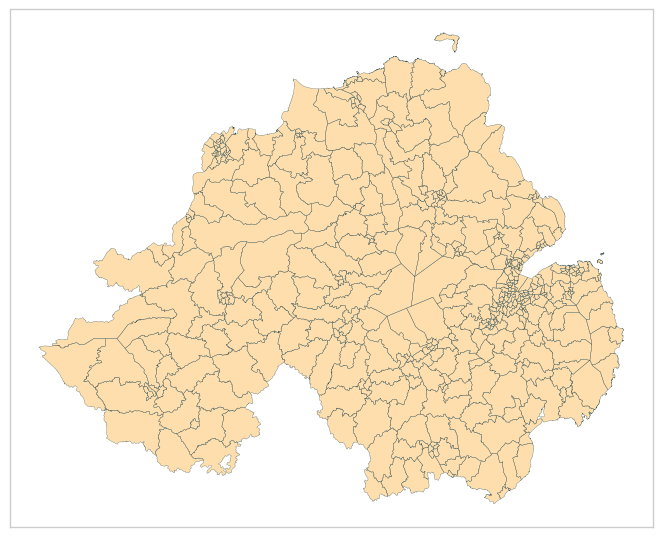

In [15]:
base = data.plot(color="navajowhite", figsize=(7, 7))
data.boundary.plot(ax=base, color="darkslategrey", linewidth=0.2)
# plt.ticklabel_format(style="scientific", scilimits=[-4, 4])
plt.tick_params(labelbottom=False, labelleft=False)
plt.tight_layout()
plt.show()

In [15]:
data.to_file(
    os.path.join("data", "boundaries", "boundaries.gpkg"),
    layer="ONS_NI_wards_12_2022_2157",
)